#### This Lab opens at 6 am on 9/8/21 and closes at 11:59 pm on  9/10/21

This Lab explores ways to calculate basic statistics, measure of spread and making a box plot for numeric variables in the data called grbooks.csv. This is a data frame with authors, book names and ratings etc. Please make sure to create a folder called Lab 3 in your DS 201 folder and save this ipynb file together with grbooks data. That way all of your solutions are separated from your other ipynb files and it  will be easier to find the solution when it is time to submit.


Let's start by importing all the necessory packages and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as mpt
import seaborn as sbn
cols=['author_name','book_title', 'book_average_rating', 'num_ratings', 'num_reviews',
        'score']

### Problem 1 (10 points)
After you upload the data, find the standard deviation, and mean absolute deviation(MAD) of 4 numerical variables listed in the previous cell. Find the variables with the lowest and highest standard deviation among these 4 variables. Do the same for MAD.  Comment on what it means for these variables to have the lowest $\sigma$, highest $\sigma$, lowest MAD, and highest MAD. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as mpt
import seaborn as sbn
cols=['author_name','book_title', 'book_average_rating', 'num_ratings', 'num_reviews',
        'score']

In [3]:
books = pd.read_csv('grbooks.csv')

In [58]:
books1 = pd.DataFrame({'book_average_rating':books['book_average_rating'], 'num_ratings':books['num_ratings'], 'num_reviews':books['num_reviews'], 'score':books['score'],})

In [61]:
books1.std()

book_average_rating         0.291317
num_ratings            180069.814253
num_reviews              6837.503574
score                   11022.018268
dtype: float64

High standard deviation means that there are values that are more spread out from the mean, while low standard deviation means the values are more clustered around the mean.

In [62]:
books1.mad()

book_average_rating        0.225215
num_ratings            66577.853866
num_reviews             3016.061533
score                   3721.948295
dtype: float64

High mean absolute deviation means that the average distance between each data value and the mean is great, while low mean absolute deviation means that the average distance between each data value and the mean is very little, or more clustered.

### Problem 2 ( 10 points)
Find the first quartile  (Q1), second quartile (Q2 = Median), and the third quartile(Q3) of the four numerical columns. Which variables have the lowest and highest interquartile range (IQR)? You can use the Quantile function in pandas to find these. More about quantile function is here.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html and here 
https://stats.stackexchange.com/questions/156778/percentile-vs-quantile-vs-quartile

In [63]:
quart = books1.quantile([0.25, 0.5, 0.75])
quart

,book_average_rating,num_ratings,num_reviews,score
0.25,3.77,820.0,106.0,832.0
0.50,3.96,4403.0,384.0,1727.0
0.75,4.14,20143.0,1504.0,3597.5


In [76]:
q3 = books1.quantile([0.75]).max()
q3

book_average_rating        4.14
num_ratings            20143.00
num_reviews             1504.00
score                   3597.50
dtype: float64

In [77]:
q1 = books1.quantile([0.25]).max()
q1

book_average_rating      3.77
num_ratings            820.00
num_reviews            106.00
score                  832.00
dtype: float64

In [80]:
range = q3-q1
range

book_average_rating        0.37
num_ratings            19323.00
num_reviews             1398.00
score                   2765.50
dtype: float64

Variable with the lowest IQR is book_average_rating. Variable with the highest IQR is num_ratings.

### Problem 3 ( 10 points)
Find the range of all 4 numerical columns. Range, by definition, is maximum minus the minimum for each variable. Using the range as a measure of spread, which variable data is ideal (symmetric), and which variable is most skewed?

In [81]:
range = books1.max()-books1.min()
range

book_average_rating          5.0
num_ratings            3820921.0
num_reviews             147696.0
score                   598215.0
dtype: float64

Variable that is most ideal is book_average_rating. Variable that is most skewed is num_ratings.

### Problem 4 ( 10 points)
We will find outliers in our data on this problem. For any variable, if any data falls below
the number $ Q1- 1.5 IQR$ or falls above the number $ Q3+ 1.5 IQR$ then those data points are outliers. Note that $IQR = Q3 - Q1$. Find how many outliers doeas each numerical variables have?

In [85]:
books1.describe

<bound method NDFrame.describe of        book_average_rating  num_ratings  num_reviews  score
0                     4.02         5260          375   3230
1                     4.13      2229163        65227   3062
2                     3.99         2151          391   4585
3                     4.14         1844          173   1533
4                     4.01        17051         1890   2105
...                    ...          ...          ...    ...
22886                 3.82          430           33   1215
22887                 4.56           82           57   1321
22888                 3.73         2698          375   1679
22889                 3.89          356           38   1897
22890                 4.57           88           14   3250

[22891 rows x 4 columns]>

In [97]:
books1[(books1.book_average_rating < 3.77 - 1.5 * 0.37) | (books1.book_average_rating > 4.14 + 1.5 * 0.37)].count()

book_average_rating    423
num_ratings            423
num_reviews            423
score                  423
dtype: int64

book_average_rating has 423 outliers.

In [105]:
books1[(books1.num_ratings < (820.0 - 1.5 * 19323.00)) | (books1.num_ratings > (20143.00 + 1.5 * 19323.00))].count()

book_average_rating    3516
num_ratings            3516
num_reviews            3516
score                  3516
dtype: int64

num_ratings has 3516 outliers.

In [107]:
books1[(books1.num_reviews < (106.0 - 1.5 * 1398.00)) | (books1.num_reviews > (1504.00 + 1.5 * 1398.00))].count()

book_average_rating    3086
num_ratings            3086
num_reviews            3086
score                  3086
dtype: int64

num_reviews has 3086 outliers.

In [108]:
books1[(books1.score < (832.00 - 1.5 * 2765.50)) | (books1.score > (3597.50 + 1.5 * 2765.50))].count()

book_average_rating    2351
num_ratings            2351
num_reviews            2351
score                  2351
dtype: int64

score has 2351 outliers.

### Problem 5 (10 points)

Create a box plot for all 4 numerical variables.

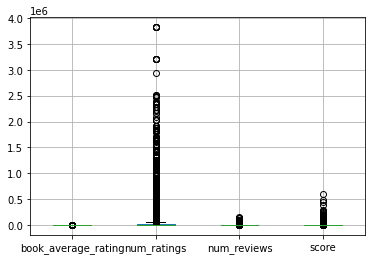

In [104]:
boxplot = books1.boxplot(column=['book_average_rating', 'num_ratings', 'num_reviews', 'score'])